In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/dataset_Facebook.csv", delimiter=";")
df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [4]:
df['Type'].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [5]:
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


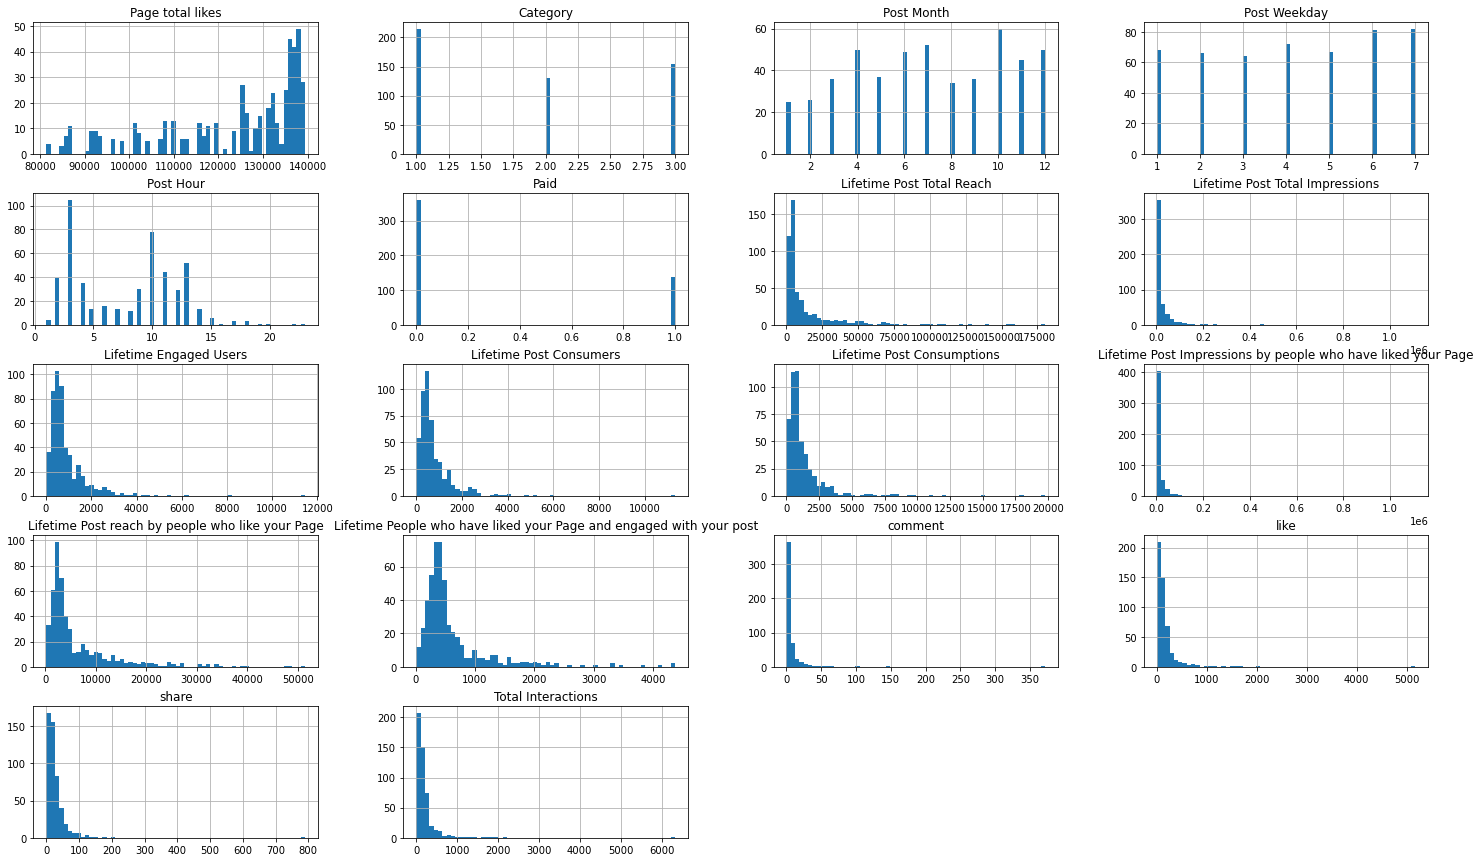

In [7]:
_ = df.hist(bins=60, figsize=(25,15))

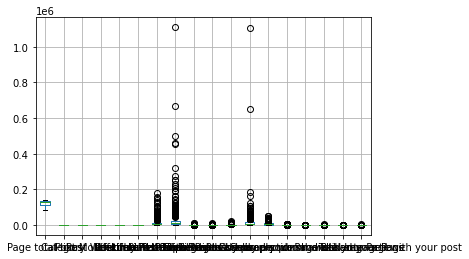

In [9]:
_ = df.boxplot()

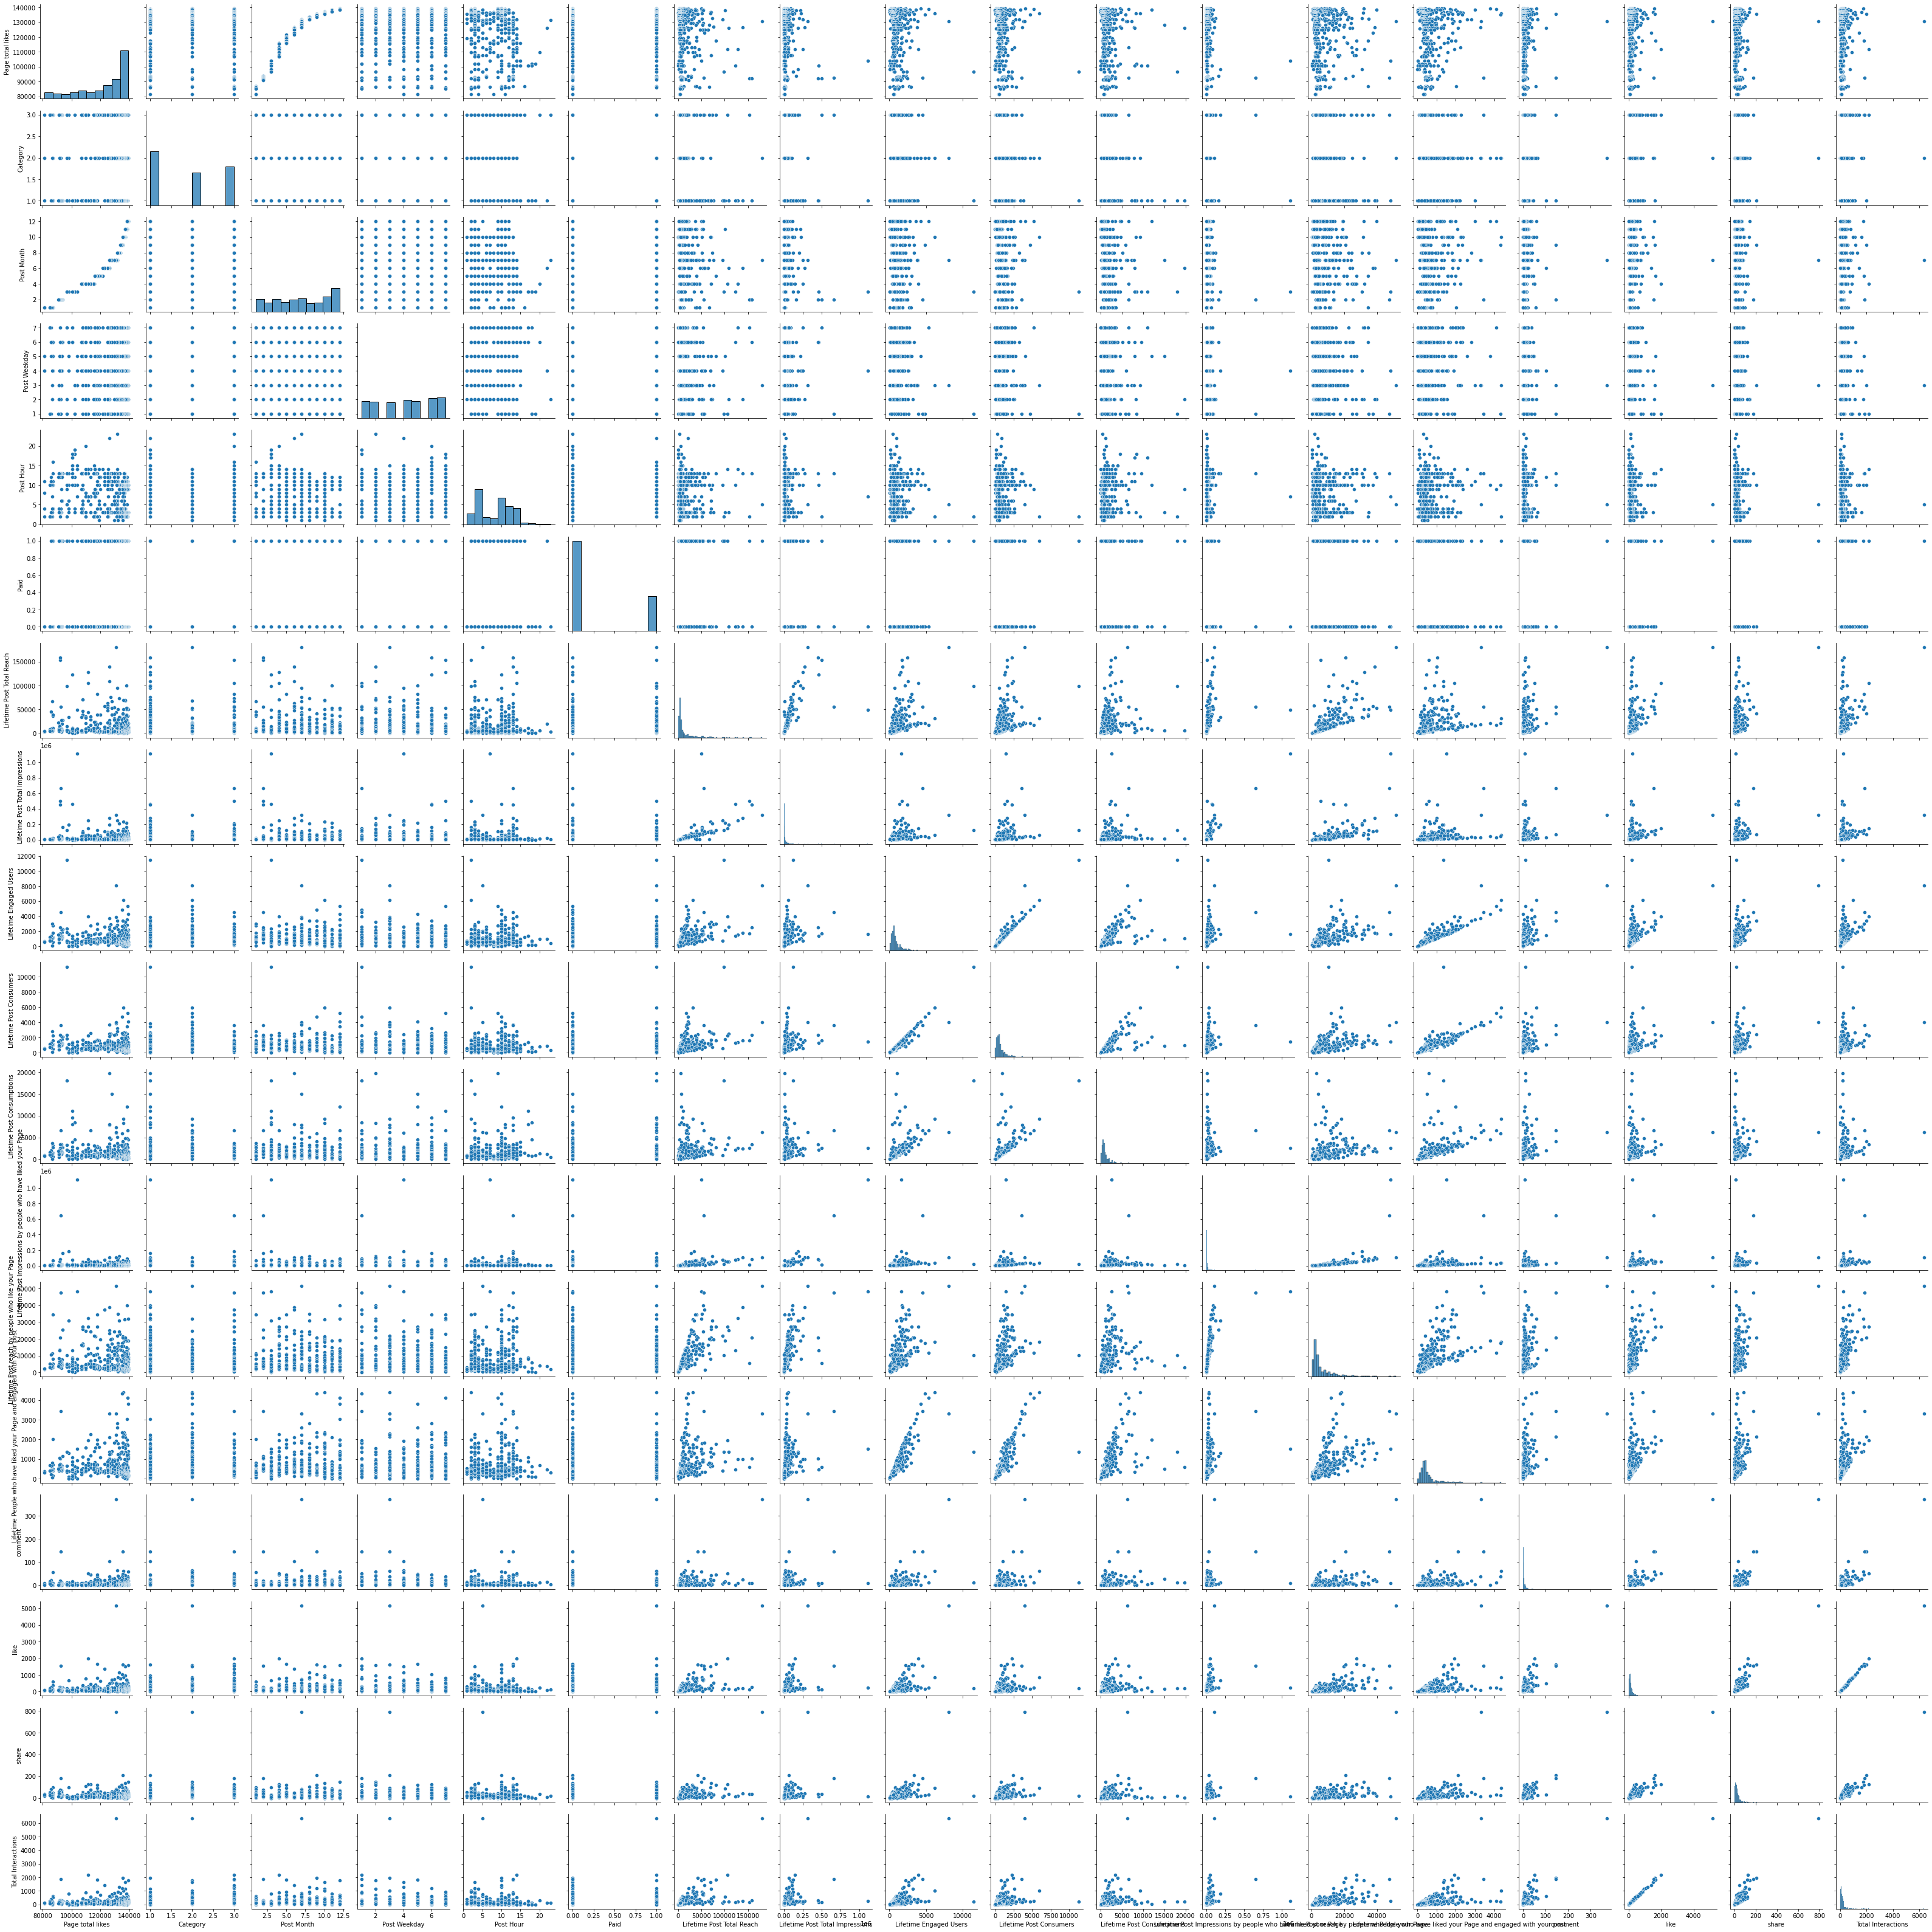

In [13]:
_ = sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/dataset_Facebook.csv", delimiter=";")
df
# Create separate training and test sets. we'll use the training set for steps 3--6
train_set, test_set = train_test_split(df, test_size=0.2, random_state=23)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
print(len(train_set), len(test_set))

400 100


In [6]:
# Let's make a copy of the training set to ensure we don't mess things up
df = train_set.copy()

In [7]:
df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
61,138185,Photo,1,11,3,2,1.0,50912,164528,630,513,952,54653,12704,346,8,144.0,10.0,162
13,139441,Photo,2,12,5,3,0.0,2549,4896,249,134,168,3631,1917,183,5,137.0,10.0,152
183,134879,Video,1,9,2,10,0.0,30624,56950,2080,1956,3253,32033,15744,1376,6,345.0,121.0,472
38,138895,Status,2,12,7,9,0.0,17576,33058,5352,5202,6547,23135,11792,4104,11,227.0,31.0,269
479,86909,Photo,3,1,5,4,0.0,6056,10325,1117,1078,1427,6823,3788,487,7,84.0,36.0,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,98195,Link,2,3,6,6,0.0,5730,10083,103,71,97,8964,4830,92,2,32.0,15.0,49
457,92828,Photo,1,2,3,6,0.0,28128,42940,2283,2190,3400,9183,4560,621,6,154.0,18.0,178
40,138895,Status,2,12,6,11,0.0,13280,24198,2055,1912,2720,17627,9344,1716,7,216.0,39.0,262
230,131630,Photo,3,7,2,23,0.0,2822,5058,424,351,486,3681,2020,327,2,113.0,20.0,135


In [8]:
features = ["Category", "Page total likes", "Type", "Post Month", "Post Hour", "Post Weekday", "Paid"]
df[features].head()

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
61,1,138185,Photo,11,2,3,1.0
13,2,139441,Photo,12,3,5,0.0
183,1,134879,Video,9,10,2,0.0
38,2,138895,Status,12,9,7,0.0
479,3,86909,Photo,1,4,5,0.0


In [9]:
df[features].tail()

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
438,2,98195,Link,3,6,6,0.0
457,1,92828,Photo,2,6,3,0.0
40,2,138895,Status,12,11,6,0.0
230,3,131630,Photo,7,23,2,0.0
83,3,137177,Photo,11,10,5,1.0


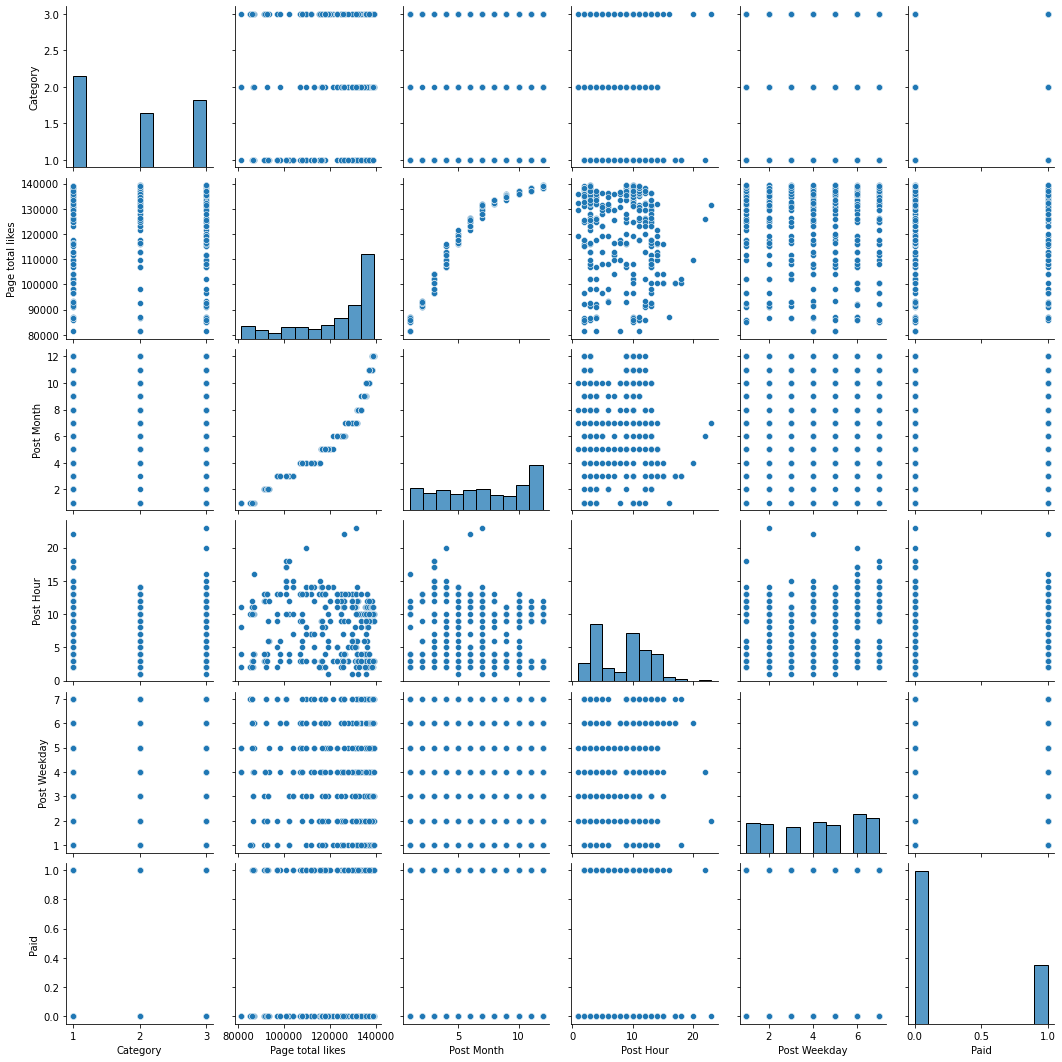

In [12]:
import seaborn as sns
# Scatterplots
_ = sns.pairplot(df[features])

In [14]:
# Correlations
correlations = df.corr()  # this is a dataframe
correlations

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
Page total likes,1.000000,-0.096787,0.940971,-0.028260,-0.129180,-0.001673,-0.093800,-0.112530,-0.110675,-0.145849,-0.125460,-0.094584,-0.051014,0.034172,0.017040,0.045435,-0.007366,0.037205
Category,-0.096787,1.000000,-0.124069,-0.060230,-0.091159,-0.024530,-0.134442,-0.085924,0.009882,-0.021708,-0.149859,-0.043779,-0.100992,0.035877,0.039961,0.123469,0.149050,0.125107
Post Month,0.940971,-0.124069,1.000000,-0.004197,-0.168966,-0.023856,-0.104868,-0.109929,-0.109777,-0.138920,-0.138308,-0.093497,-0.079047,0.014575,-0.006570,0.019471,-0.024648,0.011946
Post Weekday,-0.028260,-0.060230,-0.004197,1.000000,0.063916,-0.024724,-0.049220,-0.035733,-0.046930,-0.027865,-0.010027,-0.051996,-0.061176,0.019178,-0.068838,-0.081361,-0.055499,-0.080333
Post Hour,-0.129180,-0.091159,-0.168966,0.063916,1.000000,-0.057166,0.011832,0.016465,-0.011365,-0.007162,0.059695,0.034153,0.050381,0.028249,-0.016981,-0.018337,-0.053101,-0.022616
Paid,-0.001673,-0.024530,-0.023856,-0.024724,-0.057166,1.000000,0.135567,0.049172,0.138197,0.118849,0.121544,-0.011483,0.104275,0.079493,0.105957,0.124391,0.092159,0.122533
Lifetime Post Total Reach,-0.093800,-0.134442,-0.104868,-0.049220,0.011832,0.135567,1.000000,0.688676,0.570814,0.475171,0.313129,0.317104,0.735014,0.398342,0.447312,0.556006,0.475898,0.549866
Lifetime Post Total Impressions,-0.112530,-0.085924,-0.109929,-0.035733,0.016465,0.049172,0.688676,1.000000,0.360550,0.307249,0.216735,0.857154,0.659972,0.325692,0.324633,0.343128,0.286480,0.341303
Lifetime Engaged Users,-0.110675,0.009882,-0.109777,-0.046930,-0.011365,0.138197,0.570814,0.360550,1.000000,0.967959,0.660425,0.248536,0.598903,0.828967,0.508599,0.572801,0.537845,0.574602
Lifetime Post Consumers,-0.145849,-0.021708,-0.138920,-0.027865,-0.007162,0.118849,0.475171,0.307249,0.967959,1.000000,0.689959,0.212123,0.489740,0.801079,0.328492,0.351391,0.343991,0.355480


In [15]:
correlations['like'].sort_values(ascending=False)


like                                                                   1.000000
Total Interactions                                                     0.997956
share                                                                  0.916424
comment                                                                0.856275
Lifetime Post reach by people who like your Page                       0.634616
Lifetime Engaged Users                                                 0.572801
Lifetime Post Total Reach                                              0.556006
Lifetime People who have liked your Page and engaged with your post    0.501722
Lifetime Post Consumers                                                0.351391
Lifetime Post Total Impressions                                        0.343128
Lifetime Post Impressions by people who have liked your Page           0.247382
Lifetime Post Consumptions                                             0.231878
Paid                                    

In [16]:
correlations['Category'].sort_values(ascending=False)

Category                                                               1.000000
share                                                                  0.149050
Total Interactions                                                     0.125107
like                                                                   0.123469
comment                                                                0.039961
Lifetime People who have liked your Page and engaged with your post    0.035877
Lifetime Engaged Users                                                 0.009882
Lifetime Post Consumers                                               -0.021708
Paid                                                                  -0.024530
Lifetime Post Impressions by people who have liked your Page          -0.043779
Post Weekday                                                          -0.060230
Lifetime Post Total Impressions                                       -0.085924
Post Hour                               

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier

In [9]:
data_df = pd.read_csv('bank-additional-full.csv', delimiter=";")
data_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
data_df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [12]:
data_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


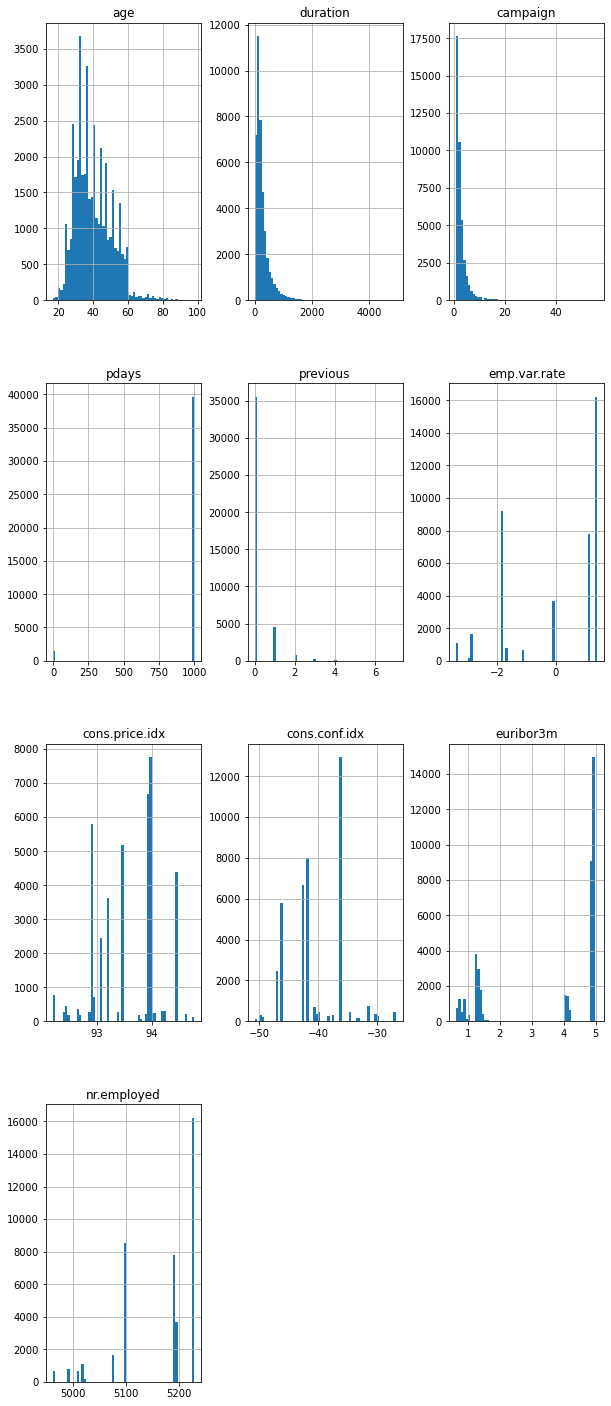

In [13]:
_ = data_df.hist(bins=60, figsize=(10,25))

In [19]:
data_encoded_df =pd.get_dummies(data_df, drop_first = True)